#           Sentiment Analysis of Real-time Flipkart Product Reviews

 ## Importing Required Libraries

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
import re
from nltk.corpus import stopwords
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Reading csv using pandas and displaying first 5 rows

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\reviews_data_dump\reviews_badminton\data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [3]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


## Checking Null values in the data

In [5]:
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


## Handling Null values

In [6]:
df['Review text'].fillna(df['Review text'].mode()[0],inplace=True)

In [7]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          0
Ratings              0
dtype: int64

## Check for duplicate values and removing them

In [8]:
df.duplicated().sum()

4

In [9]:
df = df.drop_duplicates()

In [10]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


## Ploting the Ratings Data

<Axes: xlabel='Ratings', ylabel='count'>

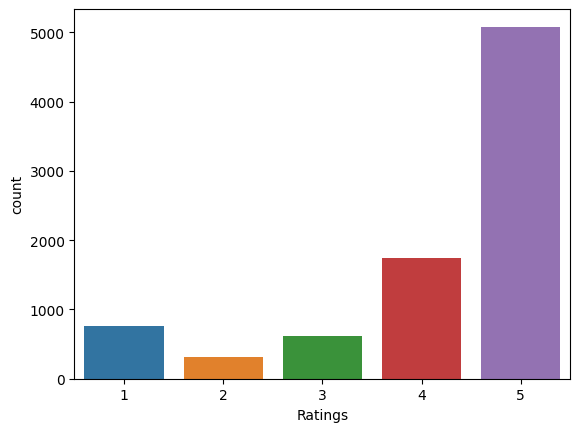

In [11]:
sns.countplot(x='Ratings', data=df)

## Ratings categorised into positive and negative

In [12]:
df['label'] = df['Ratings'].apply(lambda x: 'positive' if x >= 3 else 'negative')

# Identifying Input and Output variables

## Independent variable

In [13]:
X=df[['Review text']]

## Target/Dependent variable

In [14]:
print(df.columns)

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings', 'label'],
      dtype='object')


In [15]:
y=df[['Review Title']]

## Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

## Training data is 80% of total data and Test data is 20% of total data

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=35)
X_train

,Review text
337,"Very good shutles ,READ MORE"
3460,OkREAD MORE
4793,not badREAD MORE
7747,"Good quality,delivered earlier than expected d..."
5333,okay okay shuttlesREAD MORE
...,...
3321,Great and perfect with no defectREAD MORE
3007,Quality is not goodREAD MORE
7148,these shuttles are as good as feather shuttle ...
1295,Good shuttlecockREAD MORE


In [18]:
y_train

,Review Title
337,Just wow!
3460,Wonderful
4793,Worth every penny
7747,Nice product
5333,Fabulous!
...,...
3321,Simply awesome
3007,Expected a better product
7148,Excellent
1295,Mind-blowing purchase


In [19]:
X_test

,Review text
7890,Just greatREAD MORE
1587,Original . Awesome. Love to FlipkartREAD MORE
6624,Very bad quality shuttle.....and very very pat...
8269,GoodREAD MORE
8079,Shuttle is goodREAD MORE
...,...
6863,niceREAD MORE
334,GoodREAD MORE
3291,Good qualityREAD MORE
987,One of the best shuttle for outdoor playREAD MORE


In [20]:
y_test

,Review Title
7890,Excellent
1587,Awesome
6624,Classy product
8269,Nice
8079,Highly recommended
...,...
6863,Pretty good
334,Pretty good
3291,Fair
987,Just wow!


## Data Preprocessing of Train data and Test data

In [21]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [22]:
import nltk
import re
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
st=stopwords.words('english')
st

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,label
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,positive
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,negative
...,...,...,...,...,...,...,...,...,...
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1,negative
8510,NaN,NaN,NaN,NaN,NaN,NaN,GoodREAD MORE,1,negative
8512,NaN,NaN,NaN,NaN,NaN,NaN,GoodREAD MORE,2,negative
8513,NaN,NaN,NaN,NaN,NaN,NaN,GoodREAD MORE,5,positive


In [25]:
stem = PorterStemmer()

In [26]:
lemma = WordNetLemmatizer()

In [27]:
def preprocess(data):
    
    # removes special characters
    sentence = re.sub("[^a-zA-Z]"," ",data)
    
    # converts words to lowercase
    sentence = sentence.lower()
    
    # tokenization
    sentence = sentence.split()
    
    #removes the stop words
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    
    # can apply stem or lemm
    # applying lemmatization
    sentence = [lemma.lemmatize(word) for word in sentence]
    
    sentence=  " ".join(sentence)
    return sentence

## Converting to Lower Case

In [28]:
df['Review text']=df['Review text'].str.lower()

In [30]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review text"]]
df = df[["Review text", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                         Review text  Positive  Negative  \
0  nice product, good quality, but price is now r...     0.364     0.090   
1  they didn't supplied yonex mavis 350. outside ...     0.000     0.147   
2  worst product. damaged shuttlecocks packed in ...     0.000     0.402   
3  quite o. k. , but nowadays  the quality of the...     0.210     0.021   
4  over pricedjust â?¹620 ..from retailer.i didn'...     0.118     0.000   

   Neutral  
0    0.547  
1    0.853  
2    0.598  
3    0.768  
4    0.882  


In [32]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [33]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1887.6850000000322
Negative:  292.9469999999995
Neutral:  6333.3580000000675
